In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
y, sr = librosa.load(librosa.ex('trumpet'))

print(f"Audio duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")


Audio duration: 5.33 seconds


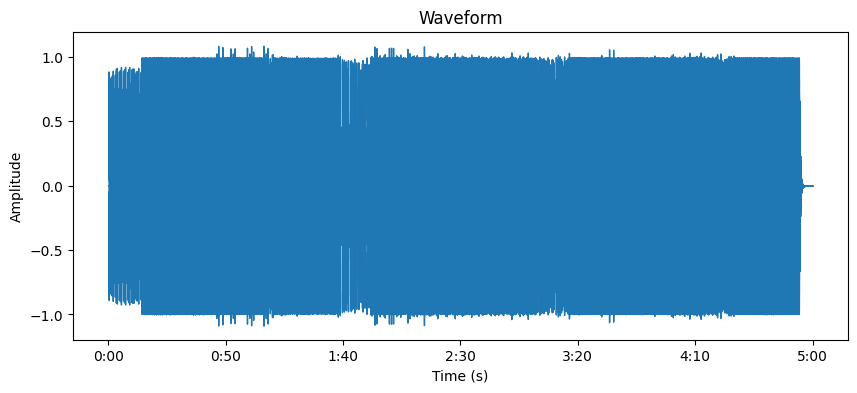

In [13]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


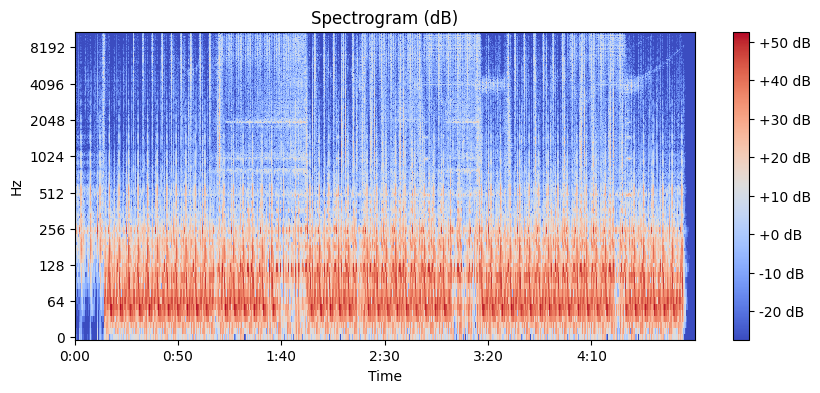

In [14]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram (dB)')
plt.show()


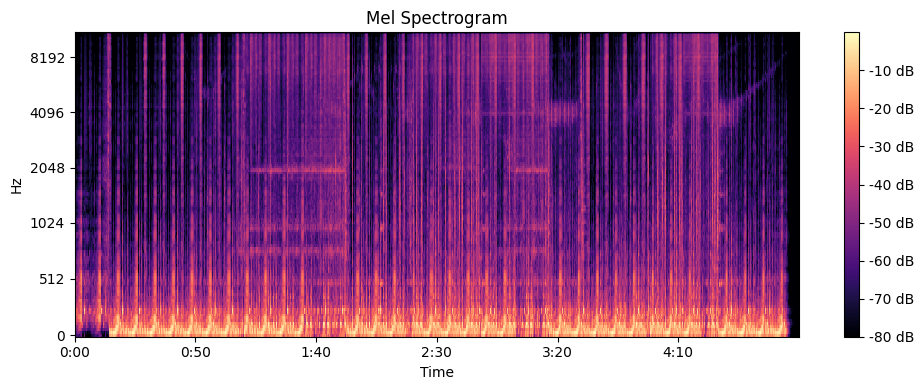

In [15]:
import numpy as np
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db_mel = librosa.power_to_db(S, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db_mel, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


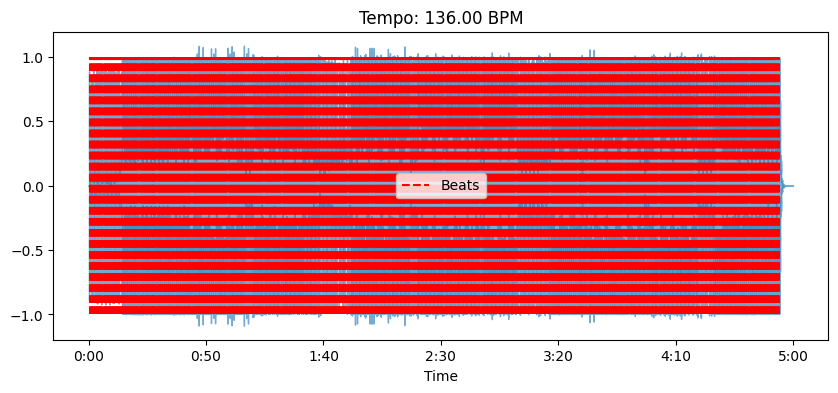

In [16]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Convert frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Plot with waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')
plt.title(f"Tempo: {tempo.item():.2f} BPM")
plt.legend()
plt.show()


In [12]:
y, sr = librosa.load(r'C:\Users\Alexis\Downloads\Chlär - The Architects of Shadows - Prophets Of Fear.wav', duration=300)  # load first 60 seconds


In [17]:
import numpy as np

spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
spec_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()

print(f"Spectral centroid: {spec_centroid:.2f}")
print(f"Bandwidth: {spec_bandwidth:.2f}")
print(f"Rolloff: {spec_rolloff:.2f}")


Spectral centroid: 1753.08
Bandwidth: 2388.63
Rolloff: 3952.66


In [18]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
avg_chroma = chroma.mean(axis=1)

print("Average chroma values per pitch class:")
print(avg_chroma)


Average chroma values per pitch class:
[0.59102124 0.39843252 0.3505112  0.3459117  0.36880898 0.3973191
 0.46202335 0.55180824 0.64355093 0.63360965 0.6604994  0.7271263 ]


In [19]:
import librosa
import numpy as np

def extract_genre_profile(audio_path):
    y, sr = librosa.load(audio_path)

    # --- Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = tempo.item()

    # --- Spectral Features
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()

    # --- Chroma (Harmonic content)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)  # Average for each pitch class (C, C#, ..., B)

    profile = {
        'tempo_bpm': round(tempo, 2),
        'spectral_centroid': round(centroid, 2),
        'spectral_rolloff': round(rolloff, 2),
        'spectral_bandwidth': round(bandwidth, 2),
        'chroma_vector': np.round(chroma_mean, 2).tolist()
    }

    return profile


In [21]:
def print_genre_summary(profile):
    print("🎶 Track Analysis\n")
    print(f"• Tempo: {profile['tempo_bpm']} BPM")

    brightness = profile['spectral_centroid']
    if brightness < 2000:
        print(f"• Brightness: Low ({brightness}) – Warm, bassy texture")
    elif brightness < 4000:
        print(f"• Brightness: Medium ({brightness}) – Balanced sound")
    else:
        print(f"• Brightness: High ({brightness}) – Sharp, treble-rich sound")

    print(f"• Spectral Rolloff: {profile['spectral_rolloff']} – Indicates energy drop-off")
    print(f"• Bandwidth: {profile['spectral_bandwidth']} – Frequency spread")

    # Chroma info
    print("\n• Harmonic Emphasis (Chroma):")
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 
             'F#', 'G', 'G#', 'A', 'A#', 'B']
    for note, val in zip(notes, profile['chroma_vector']):
        if val > np.mean(profile['chroma_vector']) + 0.1:
            print(f"  - {note}: {val} ← prominent")

    print("\n🧠 Suggested use: Match BPM, tone, and brightness for a similar vibe.")


In [22]:
audio_file = r'C:\Users\Alexis\Downloads\Chlär - The Architects of Shadows - Prophets Of Fear.wav'  # replace with your actual file
profile = extract_genre_profile(audio_file)
print_genre_summary(profile)


🎶 Track Analysis

• Tempo: 136.0 BPM
• Brightness: Low (1748.34) – Warm, bassy texture
• Spectral Rolloff: 3941.99 – Indicates energy drop-off
• Bandwidth: 2382.17 – Frequency spread

• Harmonic Emphasis (Chroma):
  - G#: 0.6399999856948853 ← prominent
  - A: 0.6299999952316284 ← prominent
  - A#: 0.6600000262260437 ← prominent
  - B: 0.7300000190734863 ← prominent

🧠 Suggested use: Match BPM, tone, and brightness for a similar vibe.


https://songdata.io/ LA MEJOR
https://tunebat.com/
FALTA PROBAR https://musicstax.com/
https://www.chosic.com/

